# Análise III

## Dia da semana

In [1]:
!pip install seaborn==0.9.0
import seaborn as sns
import pandas as pd

In [5]:
dados = pd.read_csv('gorjetas.csv', sep=';')

In [6]:
dados.head(6)

,valor_total,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15
5,25.29,4.71,Não,Domingo,Jantar,4,0.19


In [4]:
dados.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

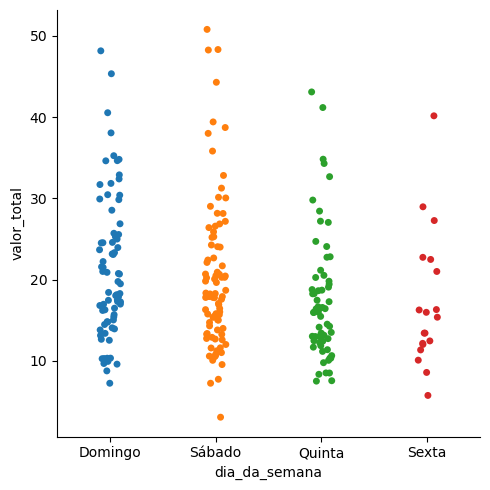

In [5]:
sns.catplot(x='dia_da_semana', y='valor_total', data=dados)

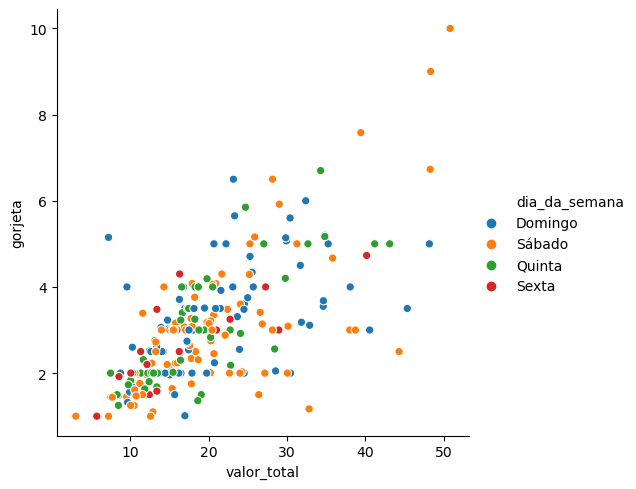

In [7]:
sns.relplot(x='valor_total', y='gorjeta', hue='dia_da_semana', data=dados)

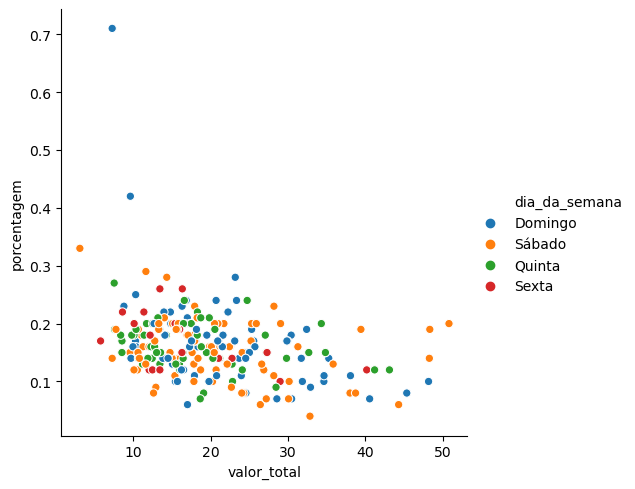

In [8]:
sns.relplot(x='valor_total', y='porcentagem', hue='dia_da_semana', data=dados)

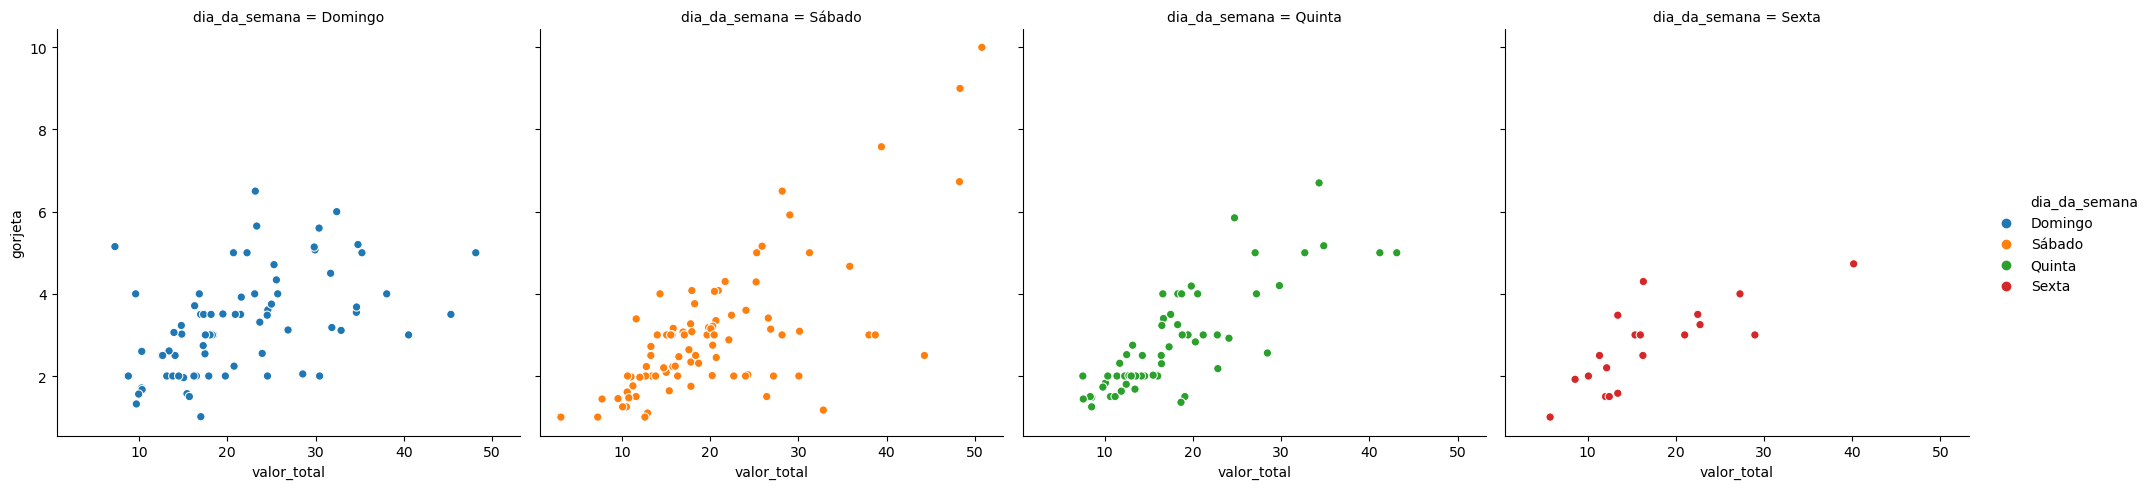

In [9]:
sns.relplot(x='valor_total', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=dados)

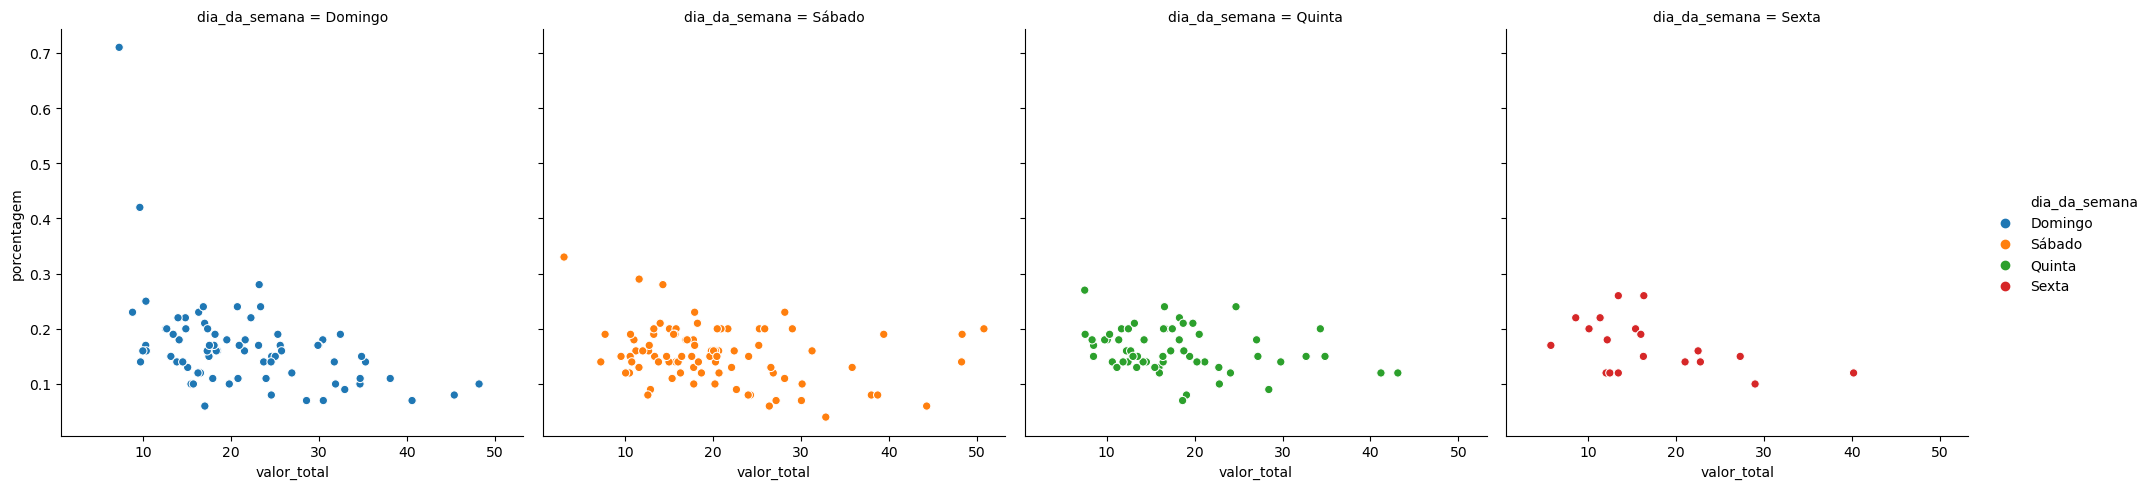

In [10]:
sns.relplot(x='valor_total', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=dados)

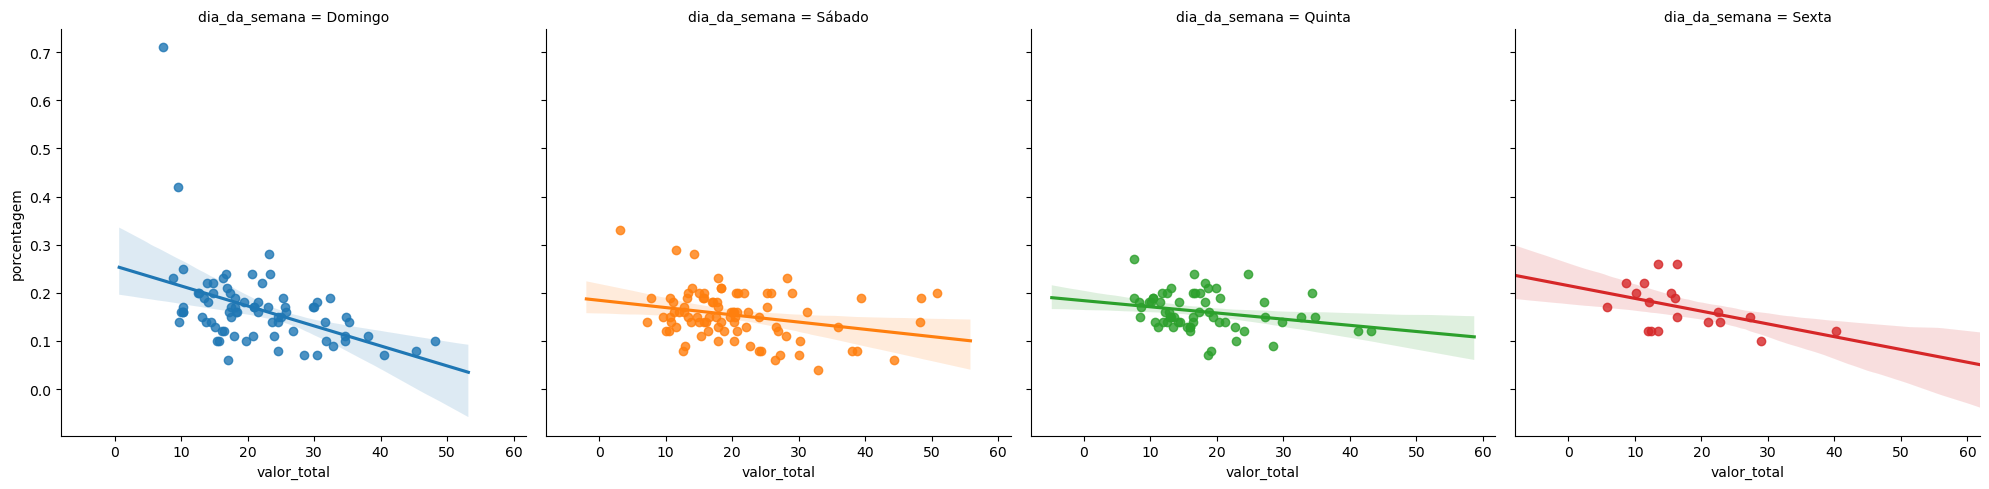

In [11]:
sns.lmplot(x='valor_total', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=dados)

In [13]:
media_gorjetas = dados.gorjeta.mean()

In [14]:
print('A média geral das gorjetas é de {}'.format(media_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [18]:
dados.groupby(['dia_da_semana']).mean()[['valor_total', 'gorjeta', 'porcentagem']]

,valor_total,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [19]:
media_dia = dados.groupby(['dia_da_semana']).mean()[['valor_total', 'gorjeta', 'porcentagem']]

In [22]:
print('Frequência dos dias')
dados.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo**



In [25]:
valor_conta_dom = dados.query("dia_da_semana == 'Domingo'").valor_total

In [26]:
valor_conta_sab = dados.query("dia_da_semana == 'Sábado'").valor_total

In [27]:
from scipy.stats import ranksums

In [29]:
r =ranksums(valor_conta_dom, valor_conta_sab)

In [30]:
print('O valor do p-values é {}'.format(r.pvalue))

O valor do p-values é 0.3576728477868443


**H<sup>null</sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**
